Total Global Pixels 26184741
Value Range: (0, 30)
Valid Pixels: 2035962
Fraction Valid wrt local region: 0.9303091325070973
Fraction Valid wrt global region: 0.07775375742689225
Mean: 27.189485549926758
Standard Deviation: 2.2868058681488037
50th Percentile: 27.78499984741211
80th Percentile: 29.2549991607666
90th Percentile: 29.64499855041504


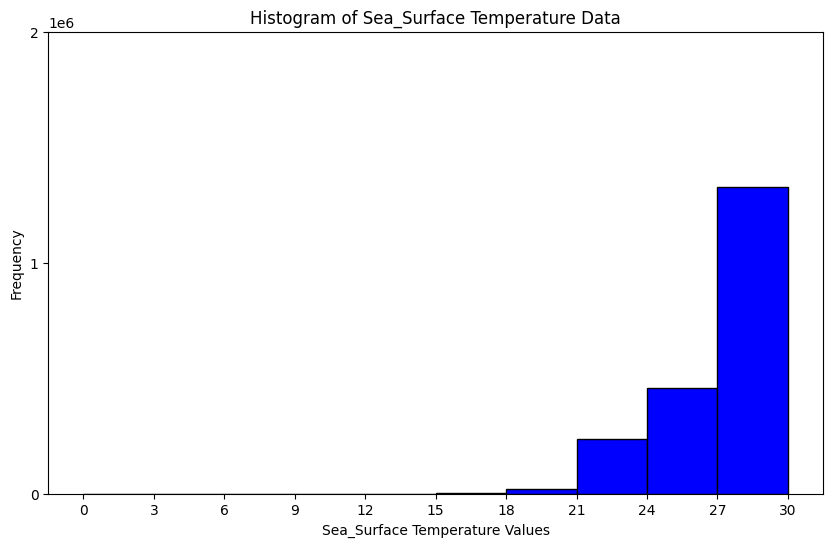

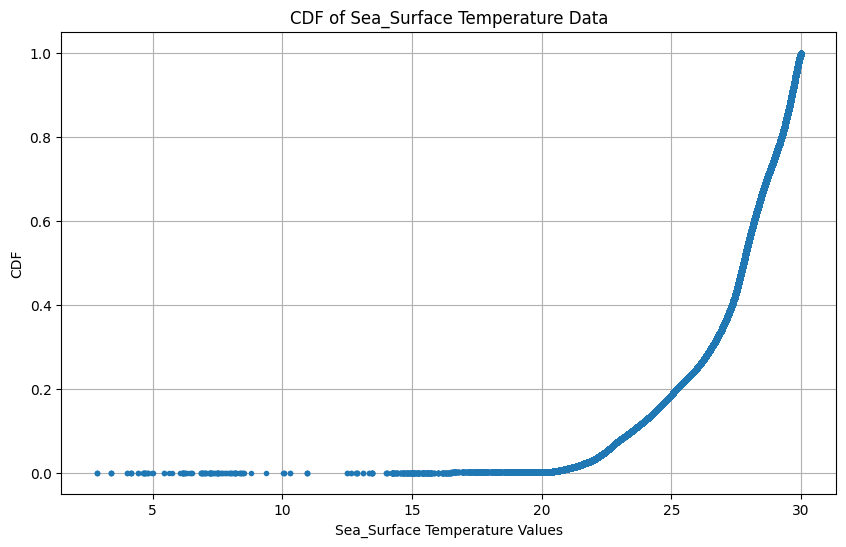

Value Range: (15, 30)
Valid Pixels: 2035734
Fraction Valid wrt local region: 0.9302049505615544
Fraction Valid wrt global region: 0.07774505006560882
Mean: 27.191390991210938
Standard Deviation: 2.279503107070923
50th Percentile: 27.78499984741211
80th Percentile: 29.2549991607666
90th Percentile: 29.64499855041504


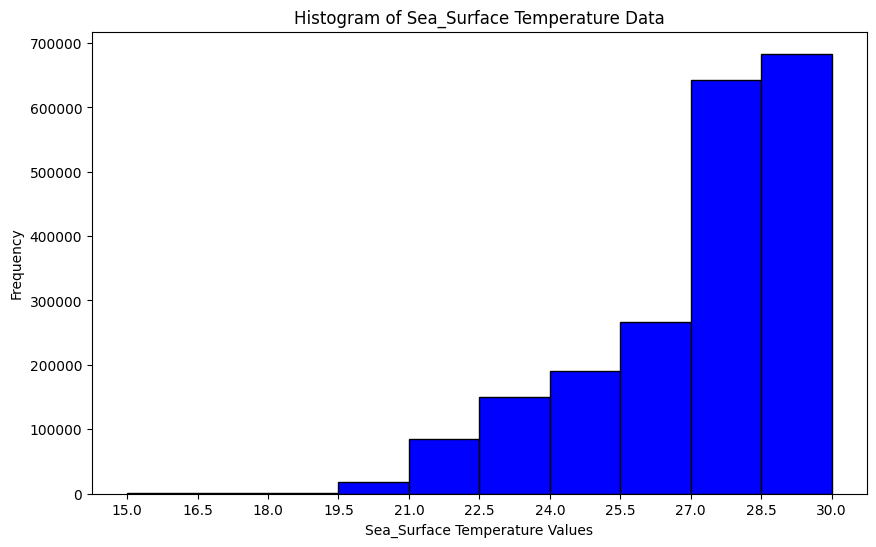

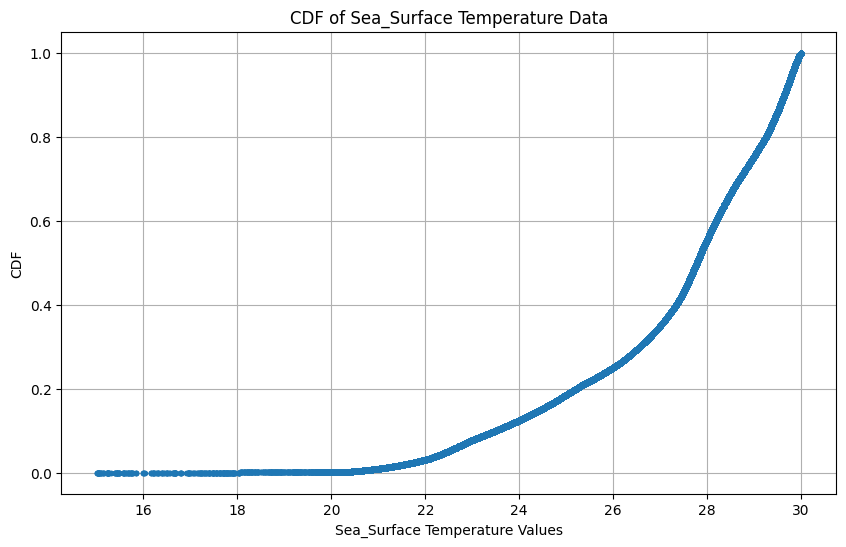

Value Range: (30, 40)
Valid Pixels: 154295
Fraction Valid wrt local region: 0.07050330389279495
Fraction Valid wrt global region: 0.005892553987835893
Mean: 31.210399627685547
Standard Deviation: 1.5595459938049316
50th Percentile: 30.56999969482422
80th Percentile: 32.14999771118164
90th Percentile: 33.43499755859375


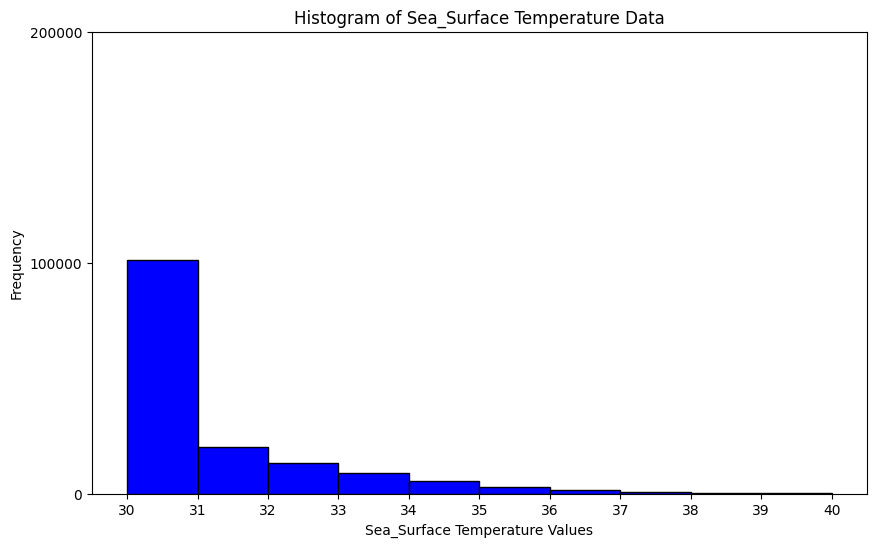

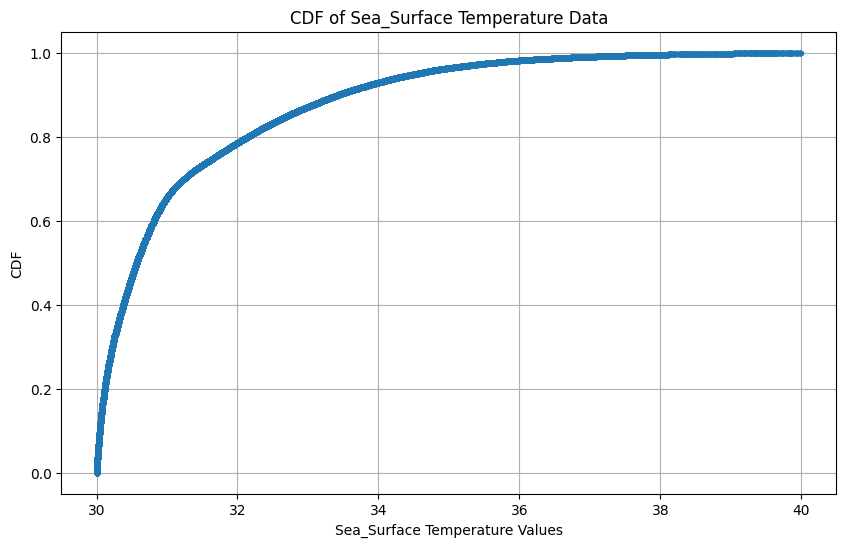


Latitude Band: 30N-30S
Value Range: (-1, 0)
No data in this range.

Latitude Band: 30N-30S
Value Range: (-2, 0)
No data in this range.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

def plot_histogram(filtered_data, value_range):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(value_range[0], value_range[1], 11)
    hist, bins, patches = plt.hist(filtered_data, bins=bins, edgecolor='black', color='blue')
    
    plt.xticks(bins)
    
    y_max = max(hist)
    a = 10 ** (len(str(int(y_max))) - 1)
    arr = np.arange(0, y_max + a, a)
    
    plt.yticks(arr)
    
    plt.xlabel('Sea_Surface Temperature Values')
    plt.ylabel('Frequency')
    plt.title('Histogram of Sea_Surface Temperature Data')
    
    plt.show()

def plot_cdf(filtered_data, value_range):
    plt.figure(figsize=(10, 6))
    sorted_data = np.sort(filtered_data)
    
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    plt.plot(sorted_data, cdf, marker='.', linestyle='none')
    
    plt.xlabel('Sea_Surface Temperature Values')
    plt.ylabel('CDF')
    plt.title('CDF of Sea_Surface Temperature Data')
    
    plt.grid(True)
    plt.show()

nc_file = nc.Dataset('AQUA_MODIS.20230101_20231231.L3m.YR.SST.sst.4km.nc', 'r')
sst_data = np.array(nc_file.variables['sst'][:])
fill_value = -32767.0
sst_data = np.where(sst_data == fill_value, np.nan, sst_data)

test_sst_data = sst_data[~np.isnan(sst_data)]

regional_pixels_global = test_sst_data.shape[0]
latitudes = nc_file.variables['lat'][:]
longitudes = nc_file.variables['lon'][:]

nc_file.close()

print("Total Global Pixels",regional_pixels_global)

latitude_bands = {
    "30N-30S": (latitudes >= -30) & (latitudes <= 30)
}

longitude_range = (longitudes >= 30) & (longitudes <= 120)

value_ranges = [
    (0, 30), (15, 30), (30, 40), (-1, 0), (-2, 0)
]

def calculate_metrics(filtered_data):
    mean_value = np.nanmean(filtered_data)
    std_dev = np.nanstd(filtered_data)
    percentiles = np.nanpercentile(filtered_data, [50, 80, 90])
    return mean_value, std_dev, percentiles

for band_name, band_filter in latitude_bands.items():
    band_lat_indices = np.where(band_filter)[0]
    filtered_data = sst_data[band_lat_indices, :]
    filtered_data = filtered_data[:, longitude_range]
    filtered_data = filtered_data[~np.isnan(filtered_data)]
    
    for value_range in value_ranges:
        range_filter = (filtered_data >= value_range[0]) & (filtered_data <= value_range[1])
        filtered_values = filtered_data[range_filter]
        regional_pixels_local = filtered_data.shape[0]
        valid_pixels = filtered_values.shape[0]
        Fraction_Valid_local = valid_pixels / regional_pixels_local
        Fraction_Valid_global = valid_pixels / regional_pixels_global
        
        if valid_pixels > 0:
            mean_value, std_dev, percentiles = calculate_metrics(filtered_values)
            #print(f"\nLatitude Band: {band_name}")
            print(f"Value Range: {value_range}")
            print(f"Valid Pixels: {valid_pixels}")
            print(f"Fraction Valid wrt local region: {Fraction_Valid_local}")
            print(f"Fraction Valid wrt global region: {Fraction_Valid_global}")
            print(f"Mean: {mean_value}")
            print(f"Standard Deviation: {std_dev}")
            print(f"50th Percentile: {percentiles[0]}")
            print(f"80th Percentile: {percentiles[1]}")
            print(f"90th Percentile: {percentiles[2]}")
            plot_histogram(filtered_values, value_range)
            plot_cdf(filtered_values, value_range)
        else:
            print(f"\nLatitude Band: {band_name}")
            print(f"Value Range: {value_range}")
            print("No data in this range.")


Total Global Pixels 26184741
Value Range: (0, 30)
Valid Pixels: 2035962
Fraction Valid wrt local region: 0.9303091325070973
Fraction Valid wrt global region: 0.07775375742689225
Mean: 27.189485549926758
Standard Deviation: 2.2868058681488037
50th Percentile: 27.78499984741211
80th Percentile: 29.2549991607666
90th Percentile: 29.64499855041504


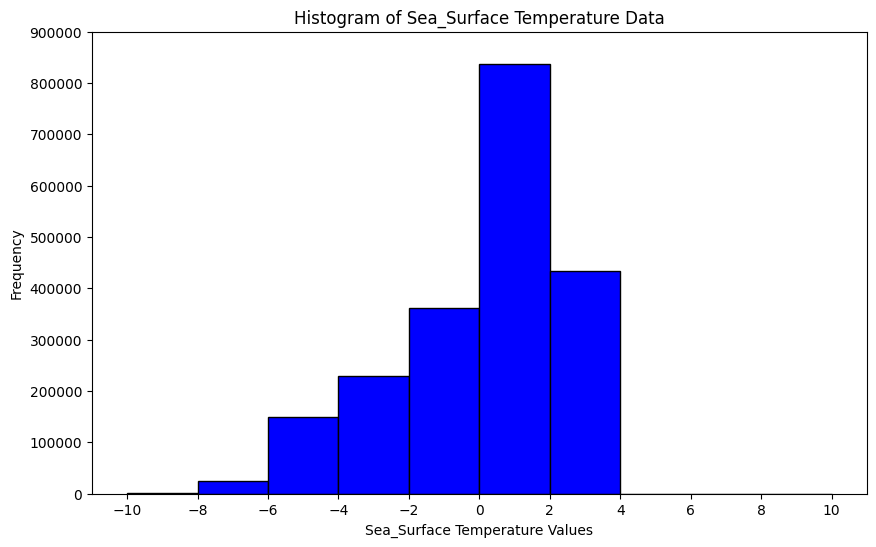

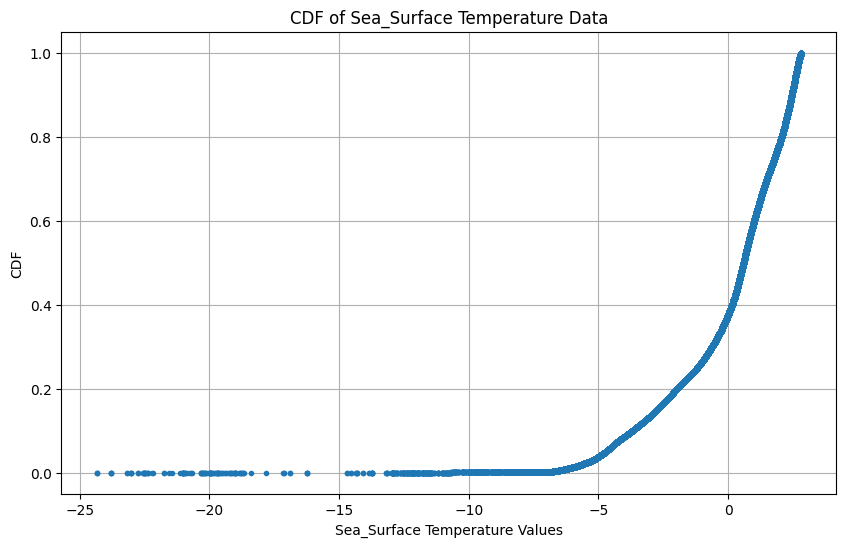

Value Range: (15, 30)
Valid Pixels: 2035734
Fraction Valid wrt local region: 0.9302049505615544
Fraction Valid wrt global region: 0.07774505006560882
Mean: 27.191390991210938
Standard Deviation: 2.279503107070923
50th Percentile: 27.78499984741211
80th Percentile: 29.2549991607666
90th Percentile: 29.64499855041504


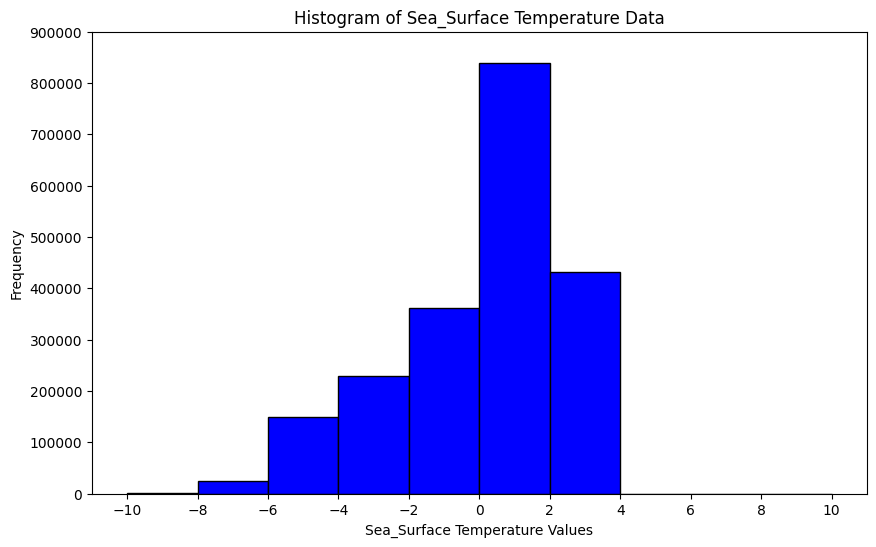

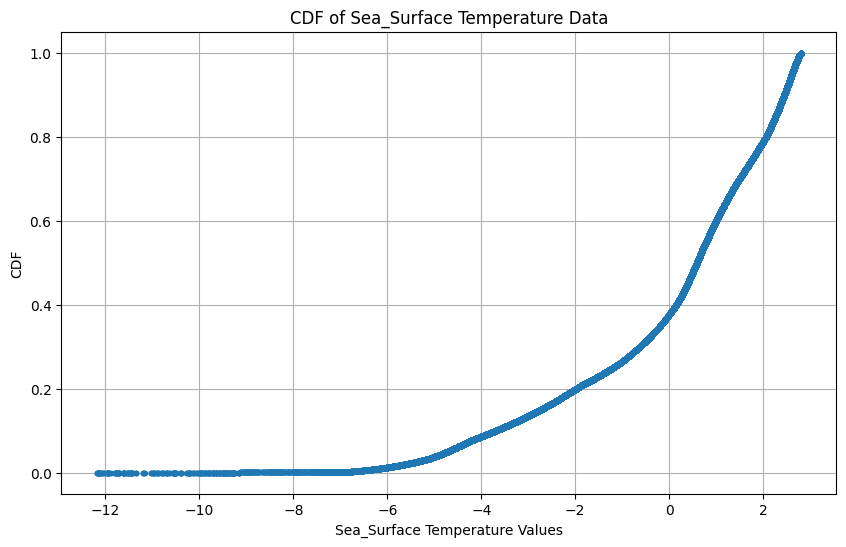

Value Range: (30, 40)
Valid Pixels: 154295
Fraction Valid wrt local region: 0.07050330389279495
Fraction Valid wrt global region: 0.005892553987835893
Mean: 31.210399627685547
Standard Deviation: 1.5595459938049316
50th Percentile: 30.56999969482422
80th Percentile: 32.14999771118164
90th Percentile: 33.43499755859375


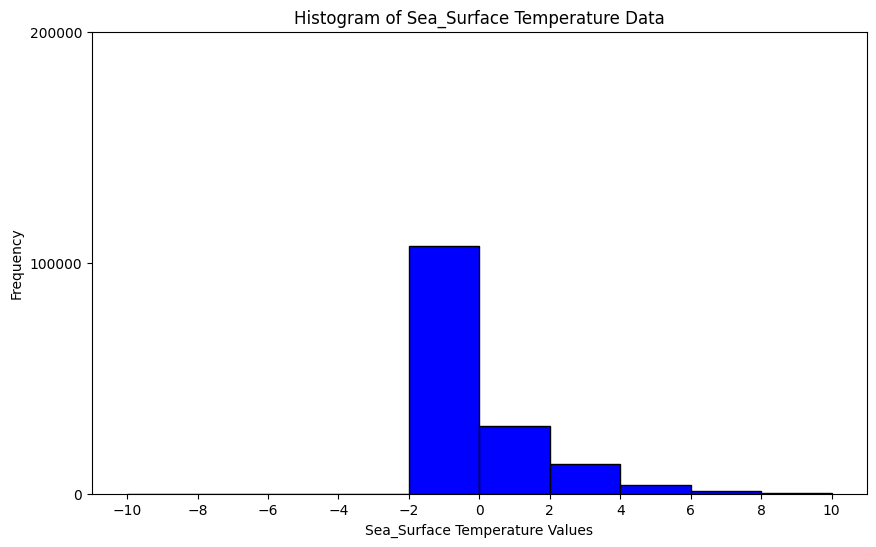

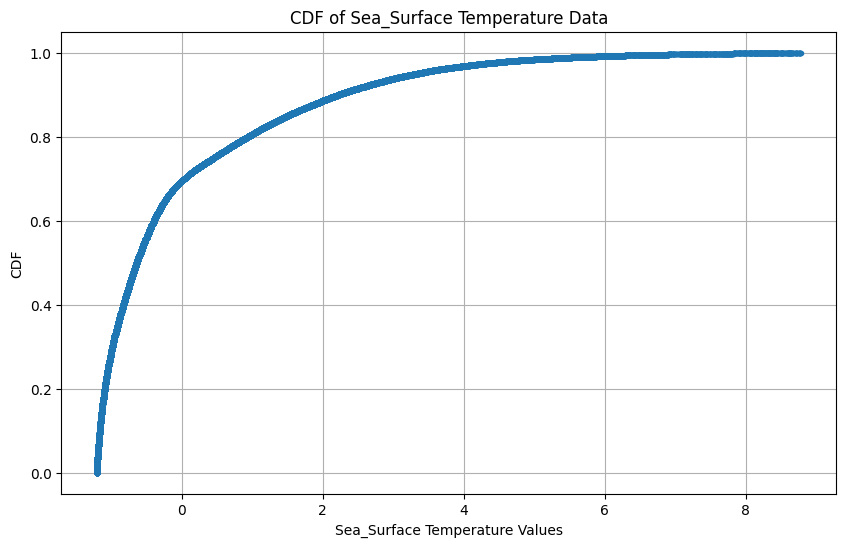


Latitude Band: 30N-30S
Value Range: (-1, 0)
No data in this range.

Latitude Band: 30N-30S
Value Range: (-2, 0)
No data in this range.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

def plot_histogram(filtered_data, value_range):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(value_range[0], value_range[1], 11)
    hist, bins, patches = plt.hist(filtered_data, bins=bins, edgecolor='black', color='blue')
    
    plt.xticks(bins)
    
    y_max = max(hist)
    a = 10 ** (len(str(int(y_max))) - 1)
    arr = np.arange(0, y_max + a, a)
    
    plt.yticks(arr)
    
    plt.xlabel('Sea_Surface Temperature Values')
    plt.ylabel('Frequency')
    plt.title('Histogram of Sea_Surface Temperature Data')
    
    plt.show()

def plot_cdf(filtered_data, value_range):
    plt.figure(figsize=(10, 6))
    sorted_data = np.sort(filtered_data)
    
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    plt.plot(sorted_data, cdf, marker='.', linestyle='none')
    
    plt.xlabel('Sea_Surface Temperature Values')
    plt.ylabel('CDF')
    plt.title('CDF of Sea_Surface Temperature Data')
    
    plt.grid(True)
    plt.show()

nc_file = nc.Dataset('AQUA_MODIS.20230101_20231231.L3m.YR.SST.sst.4km.nc', 'r')
sst_data = np.array(nc_file.variables['sst'][:])
fill_value = -32767.0
sst_data = np.where(sst_data == fill_value, np.nan, sst_data)

test_sst_data = sst_data[~np.isnan(sst_data)]

regional_pixels_global = test_sst_data.shape[0]
latitudes = nc_file.variables['lat'][:]
longitudes = nc_file.variables['lon'][:]

nc_file.close()

print("Total Global Pixels",regional_pixels_global)

latitude_bands = {
    "30N-30S": (latitudes >= -30) & (latitudes <= 30)
}

longitude_range = (longitudes >= 30) & (longitudes <= 120)

value_ranges = [
    (0, 30), (15, 30), (30, 40), (-1, 0), (-2, 0)
]

def calculate_metrics(filtered_data):
    mean_value = np.nanmean(filtered_data)
    std_dev = np.nanstd(filtered_data)
    percentiles = np.nanpercentile(filtered_data, [50, 80, 90])
    return mean_value, std_dev, percentiles

for band_name, band_filter in latitude_bands.items():
    band_lat_indices = np.where(band_filter)[0]
    filtered_data = sst_data[band_lat_indices, :]
    filtered_data = filtered_data[:, longitude_range]
    filtered_data = filtered_data[~np.isnan(filtered_data)]
    
    for value_range in value_ranges:
        range_filter = (filtered_data >= value_range[0]) & (filtered_data <= value_range[1])
        filtered_values = filtered_data[range_filter]
        regional_pixels_local = filtered_data.shape[0]
        valid_pixels = filtered_values.shape[0]
        Fraction_Valid_local = valid_pixels / regional_pixels_local
        Fraction_Valid_global = valid_pixels / regional_pixels_global
        
        if valid_pixels > 0:
            mean_value, std_dev, percentiles = calculate_metrics(filtered_values)
            #print(f"\nLatitude Band: {band_name}")
            print(f"Value Range: {value_range}")
            print(f"Valid Pixels: {valid_pixels}")
            print(f"Fraction Valid wrt local region: {Fraction_Valid_local}")
            print(f"Fraction Valid wrt global region: {Fraction_Valid_global}")
            print(f"Mean: {mean_value}")
            print(f"Standard Deviation: {std_dev}")
            print(f"50th Percentile: {percentiles[0]}")
            print(f"80th Percentile: {percentiles[1]}")
            print(f"90th Percentile: {percentiles[2]}")
            anamoly=filtered_values-mean_value
            plot_histogram(anamoly, (-10, 10) )
            plot_cdf(anamoly, (-10, 10) ) 
        else:
            print(f"\nLatitude Band: {band_name}")
            print(f"Value Range: {value_range}")
            print("No data in this range.")
